In [110]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import math

import measure_transp as mt

In [111]:
importlib.reload(mt)

<module 'measure_transp' from '/Users/lucaraffo/Desktop/Measure_Transport/measure_transp.py'>

In [112]:
t = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([0.18, 0.32, 0.42, 0.49, 0.54], dtype=float)
sigma_2 = 1e-3

step_list = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
steps, rates = mt.run_acceptance_table(y, t, sigma_2, step_list, n_steps=25000)

print("step size vs acceptance rate:")
for s, r in zip(steps, rates):
    print(f"  {s:.3f}  ->  {r:.3f}")

step_size = 0.1
chain, acc_rate = mt.rw_metropolis(y, t, sigma_2, n_samples=25000, step_size=step_size)

print(f"\nfinal run: step size={step_size}, acceptance rate={acc_rate:.4f}")

step size vs acceptance rate:
  0.005  ->  0.976
  0.010  ->  0.947
  0.050  ->  0.787
  0.100  ->  0.609
  0.500  ->  0.166
  1.000  ->  0.072

final run: step size=0.1, acceptance rate=0.6146


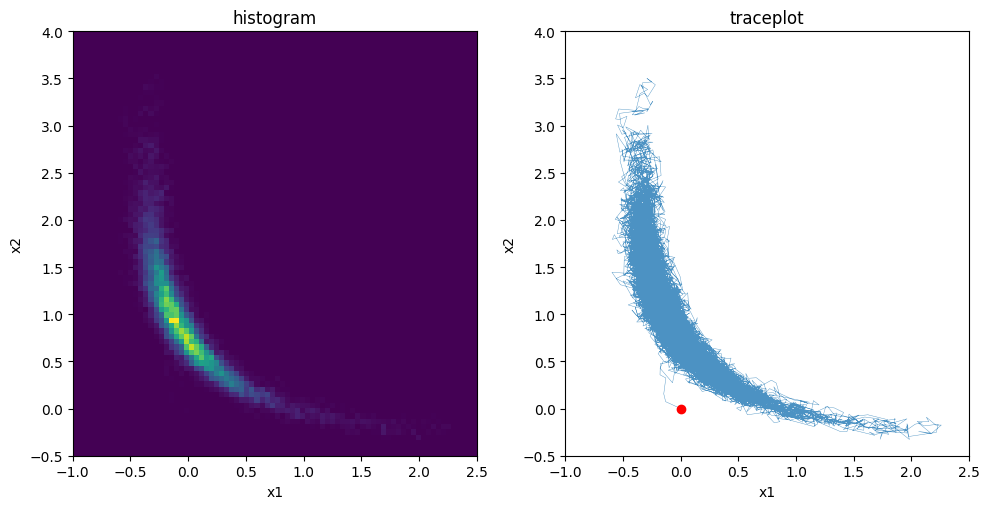

In [113]:
mt.plot_hist_and_trace(chain, start=chain[0])

In [115]:
theta1 = chain[:,0]
theta2 = chain[:,1]

m1, ci1 = mt.clt_ci_mean(theta1)
m2, ci2 = mt.clt_ci_mean(theta2)

print("\nPosterior means and 95% CIs:")
print(f"  x1: mean={m1:.4f}, CI=({ci1[0]:.4f}, {ci1[1]:.4f})")
print(f"  x2: mean={m2:.4f}, CI=({ci2[0]:.4f}, {ci2[1]:.4f})")


Posterior means and 95% CIs:
  x1: mean=-0.0099, CI=(-0.0697, 0.0499)
  x2: mean=0.9557, CI=(0.8329, 1.0785)
